Confusion Matrix:
 [[1 2]
 [0 2]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.50      1.00      0.67         2

    accuracy                           0.60         5
   macro avg       0.75      0.67      0.58         5
weighted avg       0.80      0.60      0.57         5



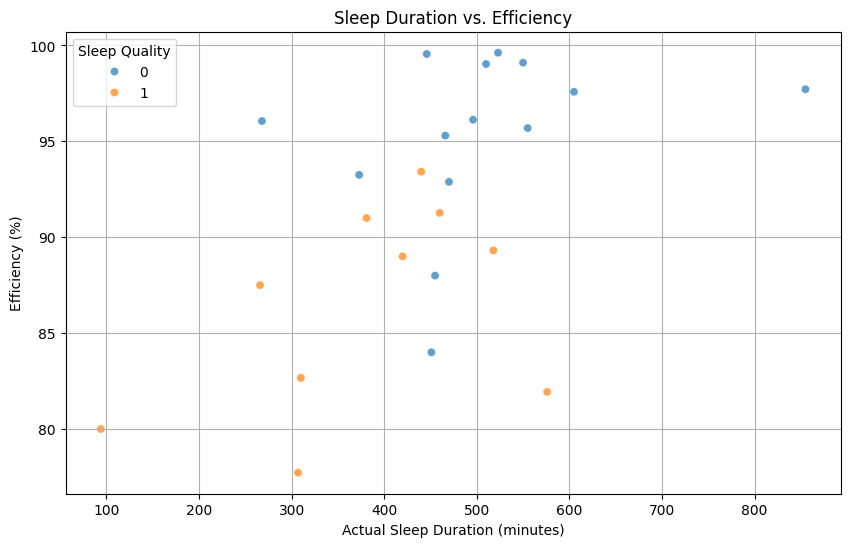

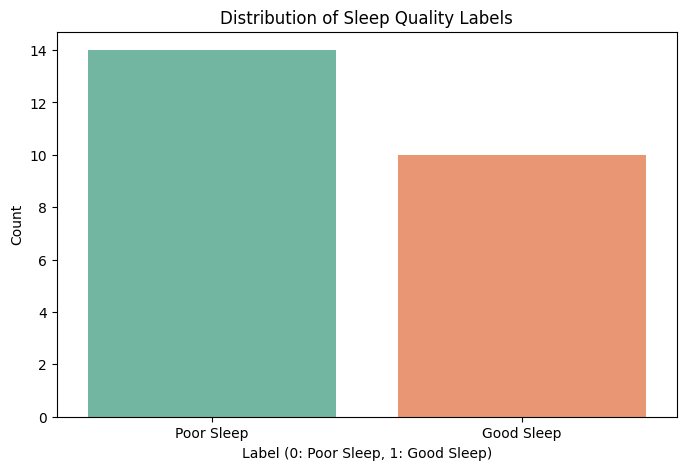

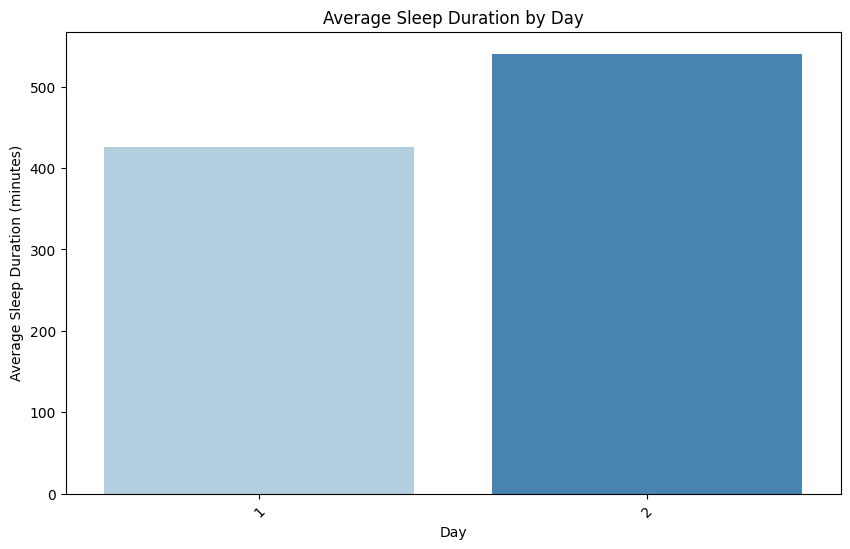

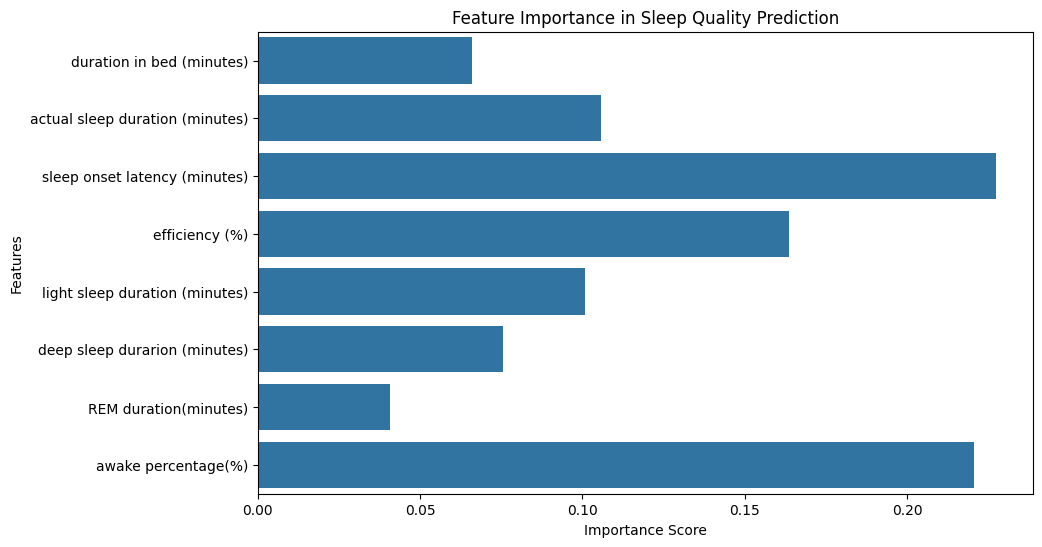

In [4]:
#### import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
data_url = r"C:\Users\manoj\Downloads\SleepQual classification.csv"
data = pd.read_csv(data_url)

# Data Preprocessing
data.dropna(inplace=True)
features = [
    'duration in bed (minutes)', 'actual sleep duration (minutes)', 
    'sleep onset latency (minutes)', 'efficiency (%)', 
    'light sleep duration (minutes)', 'deep sleep durarion (minutes)', 
    'REM duration(minutes)', 'awake percentage(%)'
]
X = data[features]
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualizations
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='actual sleep duration (minutes)', y='efficiency (%)', hue='label', alpha=0.7)
plt.title('Sleep Duration vs. Efficiency')
plt.xlabel('Actual Sleep Duration (minutes)')
plt.ylabel('Efficiency (%)')
plt.legend(title='Sleep Quality', loc='upper left')
plt.grid()
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='label', palette='Set2')
plt.title('Distribution of Sleep Quality Labels')
plt.xlabel('Label (0: Poor Sleep, 1: Good Sleep)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Poor Sleep', 'Good Sleep'])
plt.show()

avg_sleep_duration = data.groupby('day')['actual sleep duration (minutes)'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_sleep_duration, x='day', y='actual sleep duration (minutes)', palette='Blues')
plt.title('Average Sleep Duration by Day')
plt.xlabel('Day')
plt.ylabel('Average Sleep Duration (minutes)')
plt.xticks(rotation=45)
plt.show()

feature_importances = model.feature_importances_
features_list = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features_list)
plt.title('Feature Importance in Sleep Quality Prediction')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()
